In [288]:
#1. Data Manipulation [35pt]

In [289]:
import pandas as pd
df_visitor = pd.DataFrame({'visitor_id': [10512, 10512, 10512, 10512, 10692, 10692, 15391, 16239],
              'visit_date': [pd.Timestamp('01/01/2014'),pd.Timestamp('01/01/2014'),pd.Timestamp('01/01/2014'),pd.Timestamp('01/01/2014'),
                             pd.Timestamp('01/02/2014'),pd.Timestamp('01/02/2014'),pd.Timestamp('01/03/2014'),pd.Timestamp('01/04/2014')],
              'page_name':['home', 'product', 'checkout', 'about', 'home', 'product', 'home', 'home']})

In [290]:
df_cust = pd.DataFrame({'customer_id': [14332, 10512, 14331, 14342, 15332, 10692, 15391, 16239],
                       'age': [22, 32, 40, 26, 41, 21, 83, 31],
                       'fav_product': ['Shoes', 'Shirts', 'Handbags', 'Shoes', 'Handbags', 'Shirts', 'Shoes', 'Shoes']})

In [291]:
#i
df_visitor['visitor_id'].unique()

array([10512, 10692, 15391, 16239])

In [292]:
#ii
df_visitor[df_visitor['visit_date']>pd.Timestamp('1/1/2010')]

,visitor_id,visit_date,page_name
0,10512,2014-01-01,home
1,10512,2014-01-01,product
2,10512,2014-01-01,checkout
3,10512,2014-01-01,about
4,10692,2014-01-02,home
5,10692,2014-01-02,product
6,15391,2014-01-03,home
7,16239,2014-01-04,home


In [293]:
#iii
df_visitor.groupby('visitor_id').first()

,visit_date,page_name
visitor_id,,
10512,2014-01-01,home
10692,2014-01-02,home
15391,2014-01-03,home
16239,2014-01-04,home


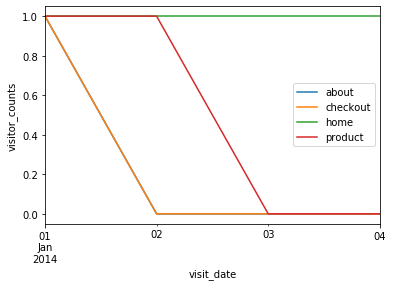

In [294]:
#iv
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

df_visitor.pivot(index='visit_date', columns='page_name', values='visitor_id').groupby(['visit_date']).count().plot(ax=ax)

ax.set_xlabel("visit_date")
ax.set_ylabel("visitor_counts")
ax.legend(loc='best')

In [295]:
#v
df_full = pd.merge(df_visitor, df_cust, left_on='visitor_id', right_on='customer_id', how='outer').fillna('Unknown')

In [296]:
df_full

,visitor_id,visit_date,page_name,customer_id,age,fav_product
0,10512,2014-01-01 00:00:00,home,10512,32,Shirts
1,10512,2014-01-01 00:00:00,product,10512,32,Shirts
2,10512,2014-01-01 00:00:00,checkout,10512,32,Shirts
3,10512,2014-01-01 00:00:00,about,10512,32,Shirts
4,10692,2014-01-02 00:00:00,home,10692,21,Shirts
5,10692,2014-01-02 00:00:00,product,10692,21,Shirts
6,15391,2014-01-03 00:00:00,home,15391,83,Shoes
7,16239,2014-01-04 00:00:00,home,16239,31,Shoes
8,Unknown,Unknown,Unknown,14332,22,Shoes
9,Unknown,Unknown,Unknown,14331,40,Handbags


In [297]:
#2 Data Analysis & Presentation Skills [55pt]

In [298]:
#i
cookie_data = pd.read_csv('fdds_coding_challenge.csv')

In [299]:
cookie_data.head()

,user_id,customer_type,first_order_type,region,subregion,state,city,post_code,product_preference,food_preference,days_to_conversion,channel_credit,first_order_date,first_order_total_revenue,90d_total_revenue,first_order_source,first_order_medium,predicted_total_ltv
0,11109.0,lion,one-time,West,Pacific,CA,COLTON,92324,monitors,pizza and pasta,261.0,Paid Social,2018-06-05,24.95,24.95,Iterable,email,40.871467
1,23640.0,lion,one-time,Midwest,East North Central,IN,INDIANAPOLIS,46241,not specified,not specified,NaN,NaN,2015-06-12,27.47,57.42,bing,cpc,98.585000
2,80970.0,lion,one-time,Northeast,Middle Atlantic,NJ,BORDENTOWN,8505,not specified,not specified,25.0,Paid Social,2016-03-13,24.95,69.90,facebook,mobilenf,34.950000
3,110985.0,lion,one-time,Midwest,East North Central,OH,SPRINGFIELD,45505,monitors,pizza,0.0,Paid Social,2015-07-20,17.47,17.47,facebook,desktopnf,22.523413
4,131766.0,lion,one-time,South,South Atlantic,FL,NAPLES,34119,earphones,pasta,NaN,NaN,2017-07-17,44.90,44.90,facebook,FB IG AN,194.742490


In [300]:
cookie_data['predicted_total_ltv'].describe()

count    373855.000000
mean        138.164695
std         193.599389
min           0.000000
25%          18.217924
50%          47.425000
75%         187.365687
max        4437.150167
Name: predicted_total_ltv, dtype: float64

In [301]:
cookie_data.sort_values('predicted_total_ltv').tail(10)

,user_id,customer_type,first_order_type,region,subregion,state,city,post_code,product_preference,food_preference,days_to_conversion,channel_credit,first_order_date,first_order_total_revenue,90d_total_revenue,first_order_source,first_order_medium,predicted_total_ltv
31413,1710753.0,lion,one-time,South,South Atlantic,GA,DALTON,30720,not specified,pizza,NaN,NaN,2015-09-25,29.95,114.80,google,organic,2682.143512
32049,1721832.0,lion,subscription,South,South Atlantic,GA,AUGUSTA,30909,not specified,not specified,NaN,NaN,2015-09-29,70.86,365.26,google,organic,2915.399629
330910,3157779.0,lion,subscription,South,South Atlantic,FL,KENNETH CITY,33709,monitors,pizza and pasta,42.0,Paid Social,2017-02-12,122.70,257.45,facebook,FB IG AN,2986.247357
138784,3358260.0,dolphin,one-time,Midwest,East North Central,MI,GRAND RAPIDS,49506,monitors,not specified,0.0,Other,2017-04-02,73.90,481.25,(direct),(none),3019.568993
240696,4719150.0,lion,subscription,South,South Atlantic,FL,NAVARRE,32566,monitors,pizza,NaN,NaN,2018-02-01,238.55,532.10,(direct),(none),3072.501812
59926,2105406.0,lion,one-time,South,South Atlantic,VA,MC LEAN,22102,monitors,pizza,41.0,TV,2016-03-16,316.40,316.40,(direct),(none),3155.847548
123735,3094314.0,lion,subscription,West,Pacific,CA,OAKLAND,94602,monitors,pizza,NaN,NaN,2017-01-27,59.90,139.75,google,organic,3418.031006
132593,3245631.0,lion,subscription,West,Pacific,CA,EL DORADO HLS,95762,monitors,pizza,219.0,Non-Paid,2017-03-06,54.90,264.45,(direct),(none),3712.299481
24618,1601148.0,lion,one-time,West,Pacific,CA,MURRIETA,92562,monitors,pizza,NaN,NaN,2015-08-16,130.80,221.65,google,cpc,3831.388415
307338,1724154.0,lion,one-time,Northeast,Middle Atlantic,NY,MANHASSET,11030,monitors,pizza,NaN,NaN,2015-09-30,101.32,411.67,google,cpc,4437.150167


In [302]:
#from sklearn.feature_selection import SelectKBest, chi2

In [303]:
#kbest = SelectKBest(chi2, k=4)

In [304]:
#X = cookie_data.drop('predicted_total_ltv', inplace=False, axis=1)

In [305]:
#3. Data Visualization

In [306]:
df_new_org = pd.read_csv('new_org_data.csv')

In [307]:
df_new_org

,employee_id,manager_employee_id,employee_name
0,310675,750317498,Elisha Bentley
1,1201346,666716720,Tomas Atkinson
2,1227778,1773740939,Kianna Benson
3,1602606,1018684196,Scarlett Stanley
4,2901687,750317498,Danica Clarke
...,...,...,...
122,6104895,748020694,Brayan Lowe
123,20100711,748020694,Jasiah Jefferson
124,601541613,741148685,Isla Matthews
125,748020694,828754905,Jordon Calderon


In [308]:
import matplotlib.pyplot as plt
import pygraphviz

In [309]:
G = pygraphviz.AGraph(directed=True)

In [310]:
import collections
relations = collections.defaultdict(list)
for emp_name, manager_id in zip(df_new_org['employee_name'],df_new_org['manager_employee_id']):
    manager_name = df_new_org[df_new_org['employee_id'] == manager_id]['employee_name'].values
    if manager_name.size > 0:
        if relations[manager_name[0]] != None:
            relations[manager_name[0]].append(emp_name)
        else:
            relations[manager_name[0]] = emp_name
for p1 in relations.keys():
    p2s = relations[p1]
    for p2 in p2s:
        G.add_edge(p1, p2)
    

In [311]:
G.layout()
s=G.string()

In [312]:

G.write("file.dot")
G.layout(prog='dot')

In [313]:
G.draw('file.png')

In [314]:
#i Head of organization is Giancarlo Avila
#ii Maximum Depth of the organization is 6